<a href="https://colab.research.google.com/github/nlama002/my-data-science-project/blob/main/tdspnima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

**1. Data Preparation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Motor_Vehicle_Collisions_-_Crashes_20250326.csv")

<ipython-input-3-462ebfa5ba00>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Motor_Vehicle_Collisions_-_Crashes_20250326.csv")


In [ ]:
desc_stats= data.describe()
desc_stats

,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,1.924492e+06,1.924492e+06,2.164263e+06,2.164250e+06,2.164281e+06,2.164281e+06,2.164281e+06,2.164281e+06,2.164281e+06,2.164281e+06,2.164281e+06
mean,4.061316e+01,-7.372568e+01,3.212669e-01,1.550653e-03,5.859036e-02,7.679225e-04,2.803471e-02,1.215184e-04,2.303620e-01,6.330047e-04,3.225183e+06
std,2.122783e+00,3.967918e+00,7.092547e-01,4.153015e-02,2.480731e-01,2.826221e-02,1.671969e-01,1.106471e-02,6.704521e-01,2.750333e-02,1.507606e+06
min,0.000000e+00,-2.013600e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+01
25%,4.066748e+01,-7.397465e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.177190e+06
50%,4.072044e+01,-7.392696e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.718412e+06
75%,4.076962e+01,-7.386670e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.259710e+06
max,4.334444e+01,0.000000e+00,4.300000e+01,8.000000e+00,2.700000e+01,6.000000e+00,4.000000e+00,2.000000e+00,4.300000e+01,5.000000e+00,4.801040e+06


**2. Data pre-processing and exploration**

In [ ]:
# prompt: checking the dataset for missing values

missing_values = data.isnull().sum()


missing_values_percentage = (missing_values / len(data)) * 100


missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
missing_data.sort_values(by='Percentage', ascending=False)

,Missing Values,Percentage
VEHICLE TYPE CODE 5,2154862,99.564798
CONTRIBUTING FACTOR VEHICLE 5,2154560,99.550844
VEHICLE TYPE CODE 4,2129989,98.415548
CONTRIBUTING FACTOR VEHICLE 4,2128709,98.356406
VEHICLE TYPE CODE 3,2014079,93.059958
CONTRIBUTING FACTOR VEHICLE 3,2008152,92.786103
OFF STREET NAME,1790411,82.725441
CROSS STREET NAME,825655,38.149159
ZIP CODE,669517,30.934846
BOROUGH,669248,30.922417


from matplotlib import pyplot as plt
_df_0['Missing Values'].plot(kind='hist', bins=20, title='Missing Values')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Percentage'].plot(kind='hist', bins=20, title='Percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Missing Values', y='Percentage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Missing Values'].plot(kind='line', figsize=(8, 4), title='Missing Values')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Percentage'].plot(kind='line', figsize=(8, 4), title='Percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Missing Values'].plot(kind='hist', bins=20, title='Missing Values')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Percentage'].plot(kind='hist', bins=20, title='Percentage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Missing Values', y='Percentage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Missing Values'].plot(kind='line', figsize=(8, 4), title='Missing Values')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Percentage'].plot(kind='line', figsize=(8, 4), title='Percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-6-fb44962ff5c1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_factors.index, y=top_factors.values, palette="magma")


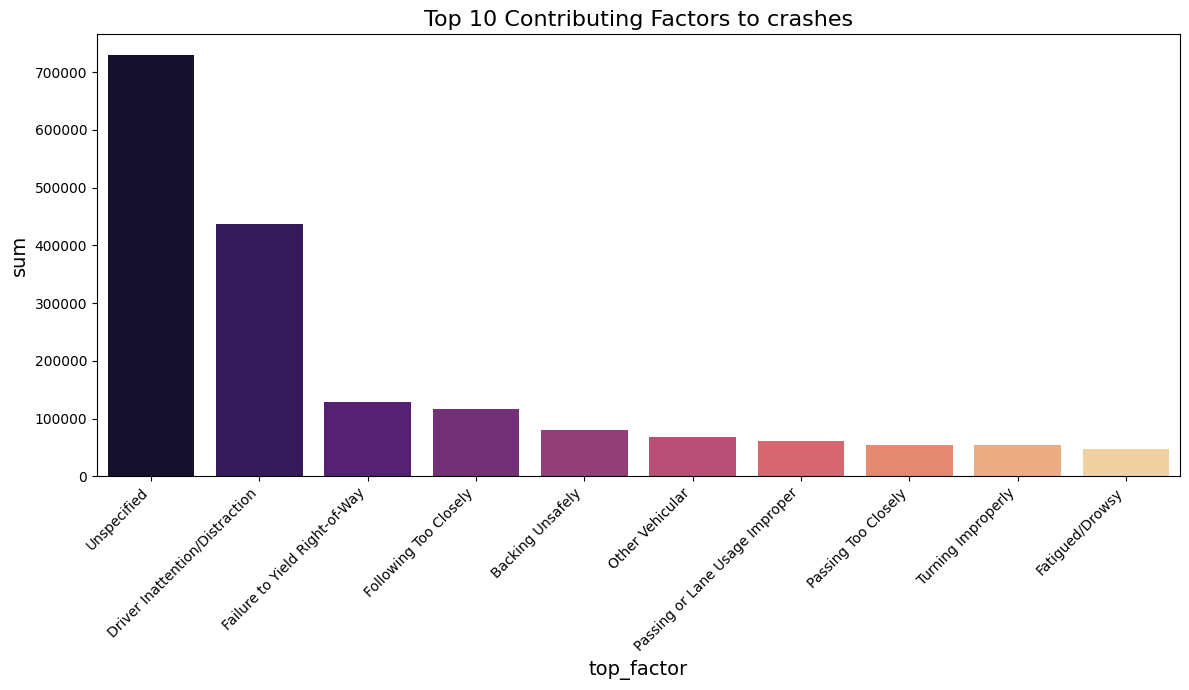

In [ ]:
#Finding top 10 factors contributing to vehicle crashes.

top_factors = data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)


plt.figure(figsize=(12, 7))
# TODO: Plotting the top contributing factors, fill in x as the index field of the variable 'top_factors'
sns.barplot(x=top_factors.index, y=top_factors.values, palette="magma")
plt.title('Top 10 Contributing Factors to crashes', fontsize=16)
plt.xlabel('top_factor', fontsize=14)
plt.ylabel('sum', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Apart from unspecified top 3 contributing factor that caused more crashes were "Driver distraction", "failure to yield right of way" and "following too closely".

**Creating  a new barchart to determine which vehicle types were involved in most crashes.** **bold text**


<ipython-input-8-60a23b4a3d77>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_vehicle_types.index, y=top_vehicle_types.values, palette="cividis")


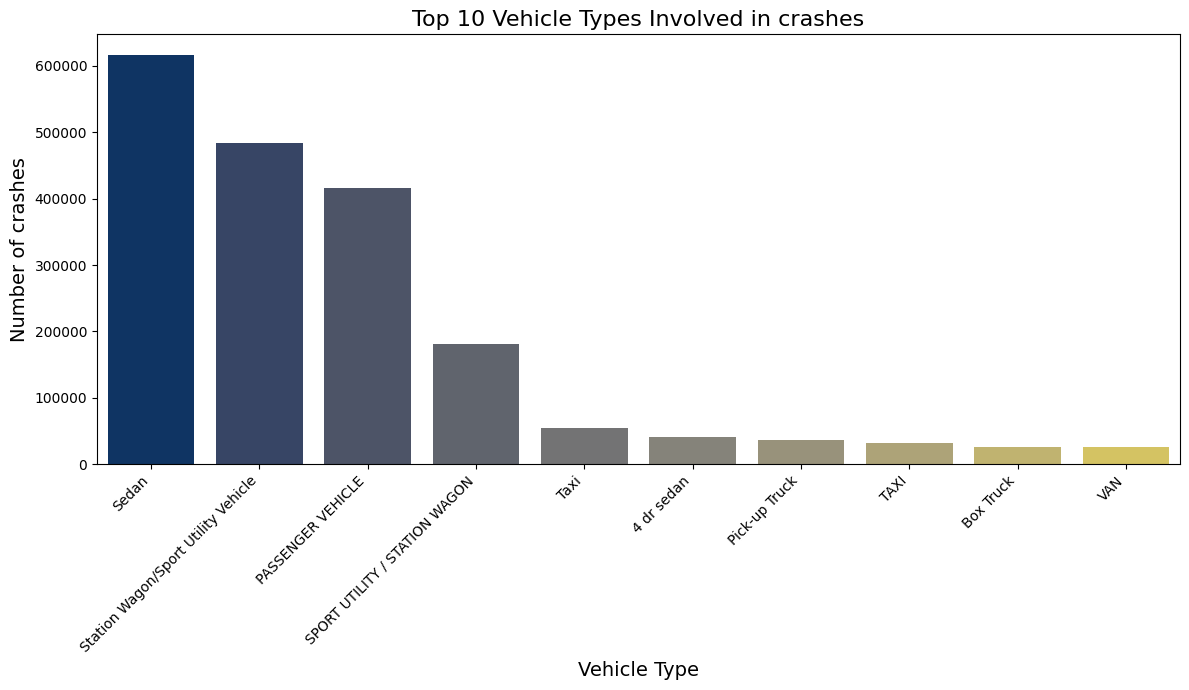

In [ ]:
# Determine the top vehicle types involved in crashes
top_vehicle_types = data['VEHICLE TYPE CODE 1'].value_counts().head(10)

# Plotting the top vehicle types
plt.figure(figsize=(12, 7))
sns.barplot(x=top_vehicle_types.index, y=top_vehicle_types.values, palette="cividis")
plt.title('Top 10 Vehicle Types Involved in crashes', fontsize=16)
plt.xlabel('Vehicle Type', fontsize=14)
plt.ylabel('Number of crashes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Top 3 vehicles that were involved in crash were Sedan , Sport utility vehicle and passenger vehicle.


I think Sedans have more number of crashes and deaths because they are the most common type
of vehicles that is on the road. Additionally, I also think there are alot of
young riders of sedan who are inexperienced as drivers and causes road accidents.


<ipython-input-9-d8af4cef0dfa>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Crashes', y='Crash Type', data=crash_types_df, palette="mako")


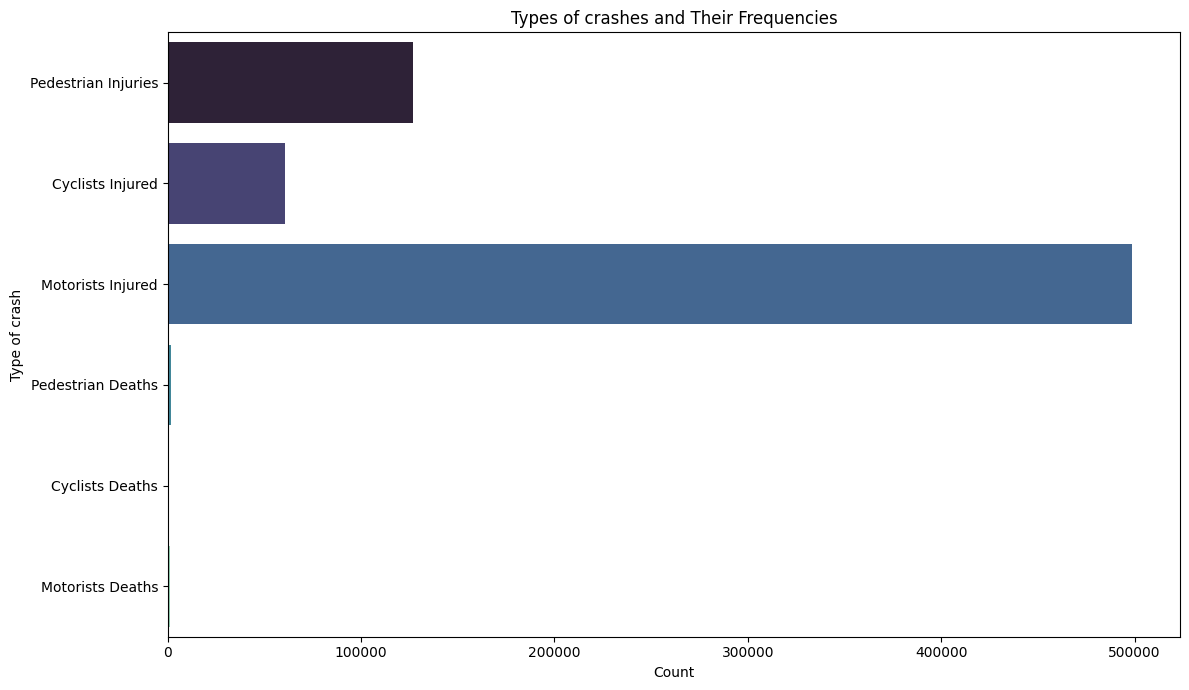

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Aggregating data - for cyclist and motorist

type_of_crashes ={
    'Pedestrian Injuries':data['NUMBER OF PEDESTRIANS INJURED'].sum(),
    'Cyclists Injured':data['NUMBER OF CYCLIST INJURED'].sum(),
    'Motorists Injured':data['NUMBER OF MOTORIST INJURED'].sum(),
    'Pedestrian Deaths':data['NUMBER OF PEDESTRIANS KILLED'].sum(),
    'Cyclists Deaths':data['NUMBER OF CYCLIST KILLED'].sum(),
    'Motorists Deaths':data['NUMBER OF MOTORIST KILLED'].sum()
}

crash_types_df = pd.DataFrame(list(type_of_crashes.items()), columns=['Crash Type', 'Number of Crashes'])

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(x='Number of Crashes', y='Crash Type', data=crash_types_df, palette="mako")
plt.title('Types of crashes and Their Frequencies')
plt.xlabel('Count')
plt.ylabel('Type of crash')
plt.tight_layout()
plt.show()


Based on the above data I would suggest motorist to ride carefully and be aware of their surroundings.

**3. Time Series Analysis**

In [ ]:
data.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.62179,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


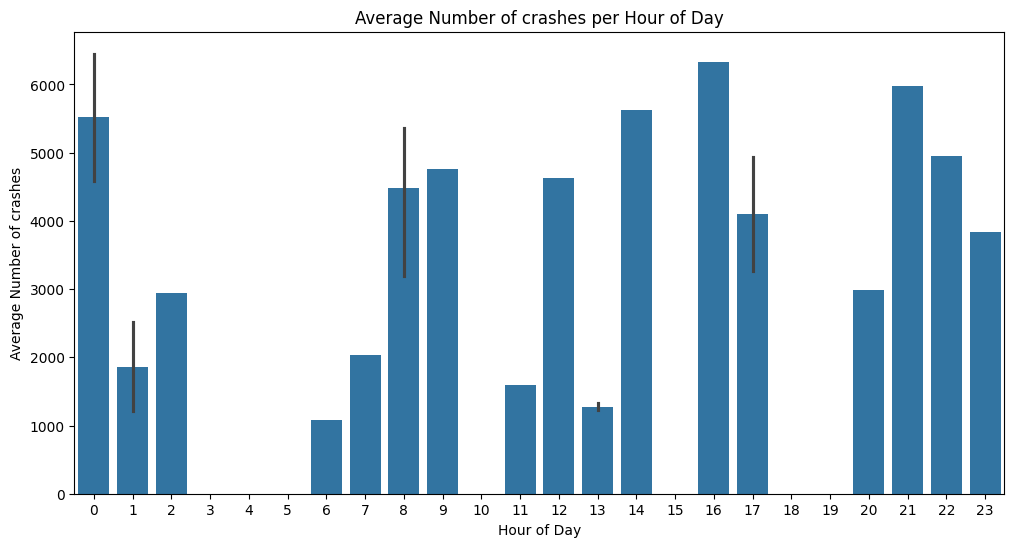

In [ ]:
#converting crash date and time to datetime
data['CRASH DATE']= pd.to_datetime(data['CRASH DATE'])
data['CRASH TIME']= pd.to_datetime(data['CRASH TIME'], format='%H:%M')

data['Hour of Day'] = data['CRASH TIME'].dt.hour

average_crashes_per_hour = data.groupby('Hour of Day').size()/data['Hour of Day'].nunique()

plt.figure(figsize=(12, 6))
sns.barplot(x= data['Hour of Day'],y=average_crashes_per_hour)
plt.title('Average Number of crashes per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of crashes')
plt.xticks(range(0, 24))
plt.show()


- 4 PM shows the most number of crashes. I think most crashes occur during this time because there is heavy traffic.


**Step 3 : Covid 19 impact on the number of crashes.**

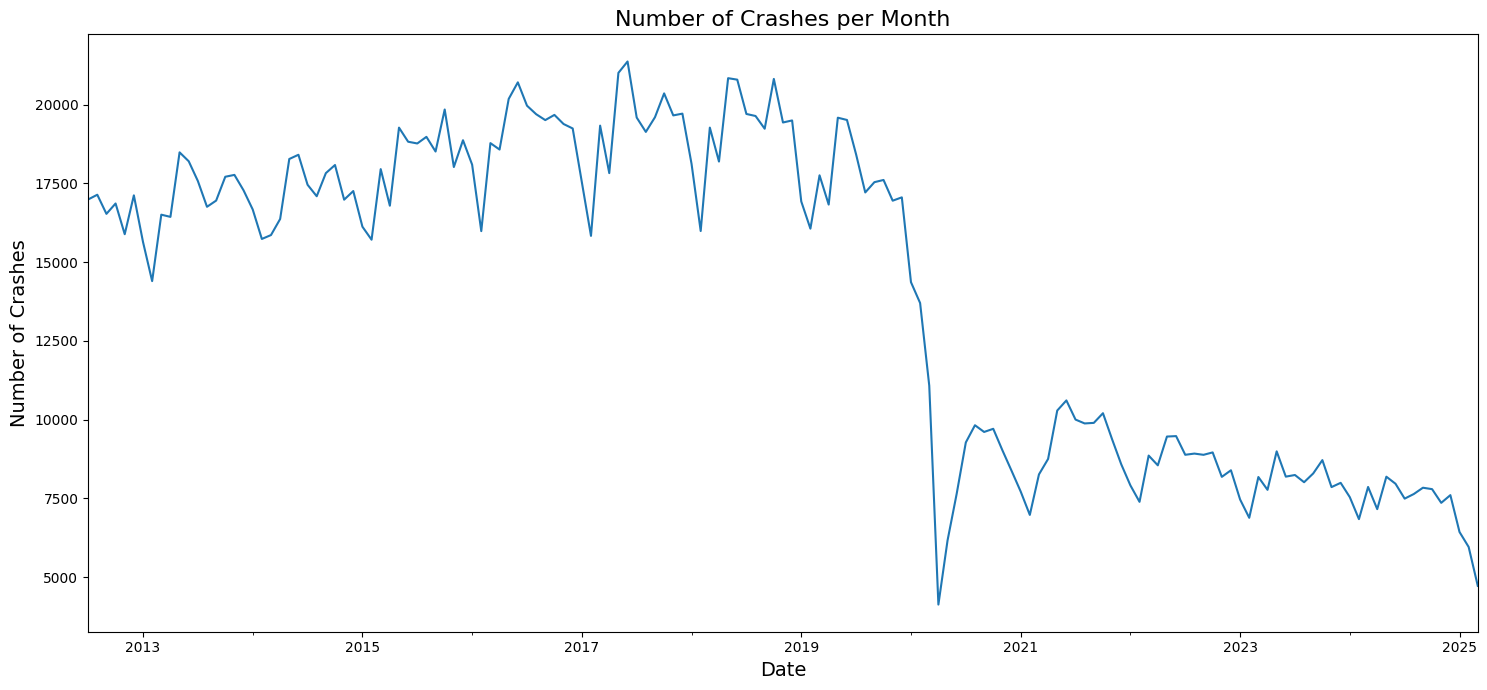

In [ ]:
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

# Group by month and year to get the number of crashes per month
monthly_crashes = data.groupby(data['CRASH DATE'].dt.to_period("M")).size()

# Plotting the trend over time
plt.figure(figsize=(15,7))
monthly_crashes.plot()
plt.title('Number of Crashes per Month', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.tight_layout()
plt.show()

During covid we can see that there was a drastic drop in monthly crash and since then the crash has gone down significantly.

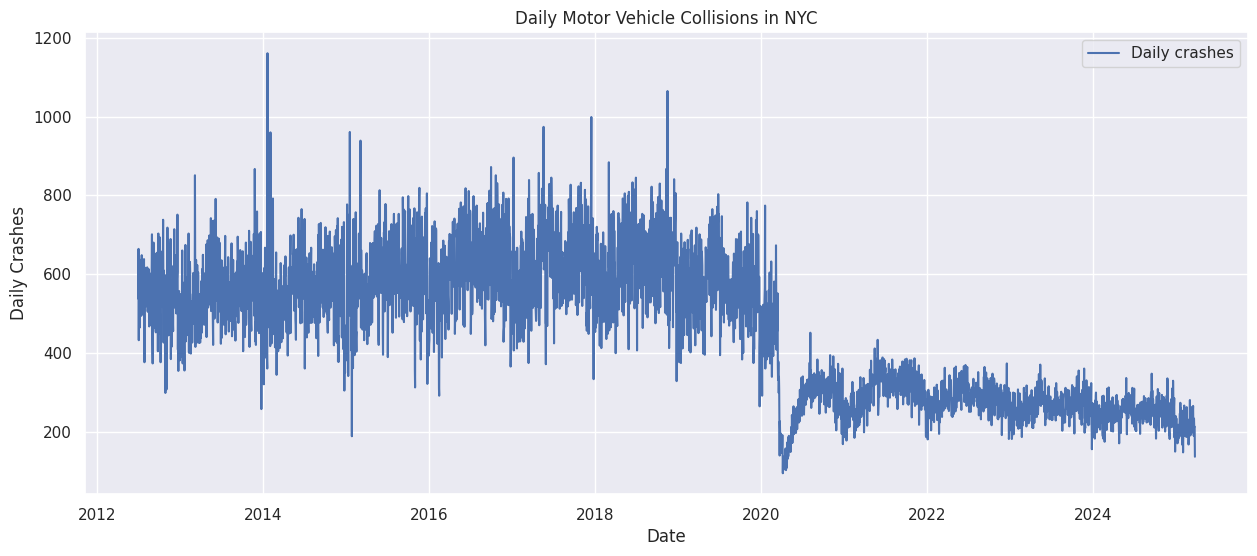

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

daily_crashes = data.groupby(data['CRASH DATE'].dt.date).size()

sns.set(style="darkgrid")

# Plot the daily crashes time series
plt.figure(figsize=(15, 6))
plt.plot(daily_crashes, label='Daily crashes')
plt.title('Daily Motor Vehicle Collisions in NYC')
plt.xlabel('Date')
plt.ylabel('Daily Crashes')
plt.legend()
plt.show()


# Decompose the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(daily_crashes, model='additive', period=365)



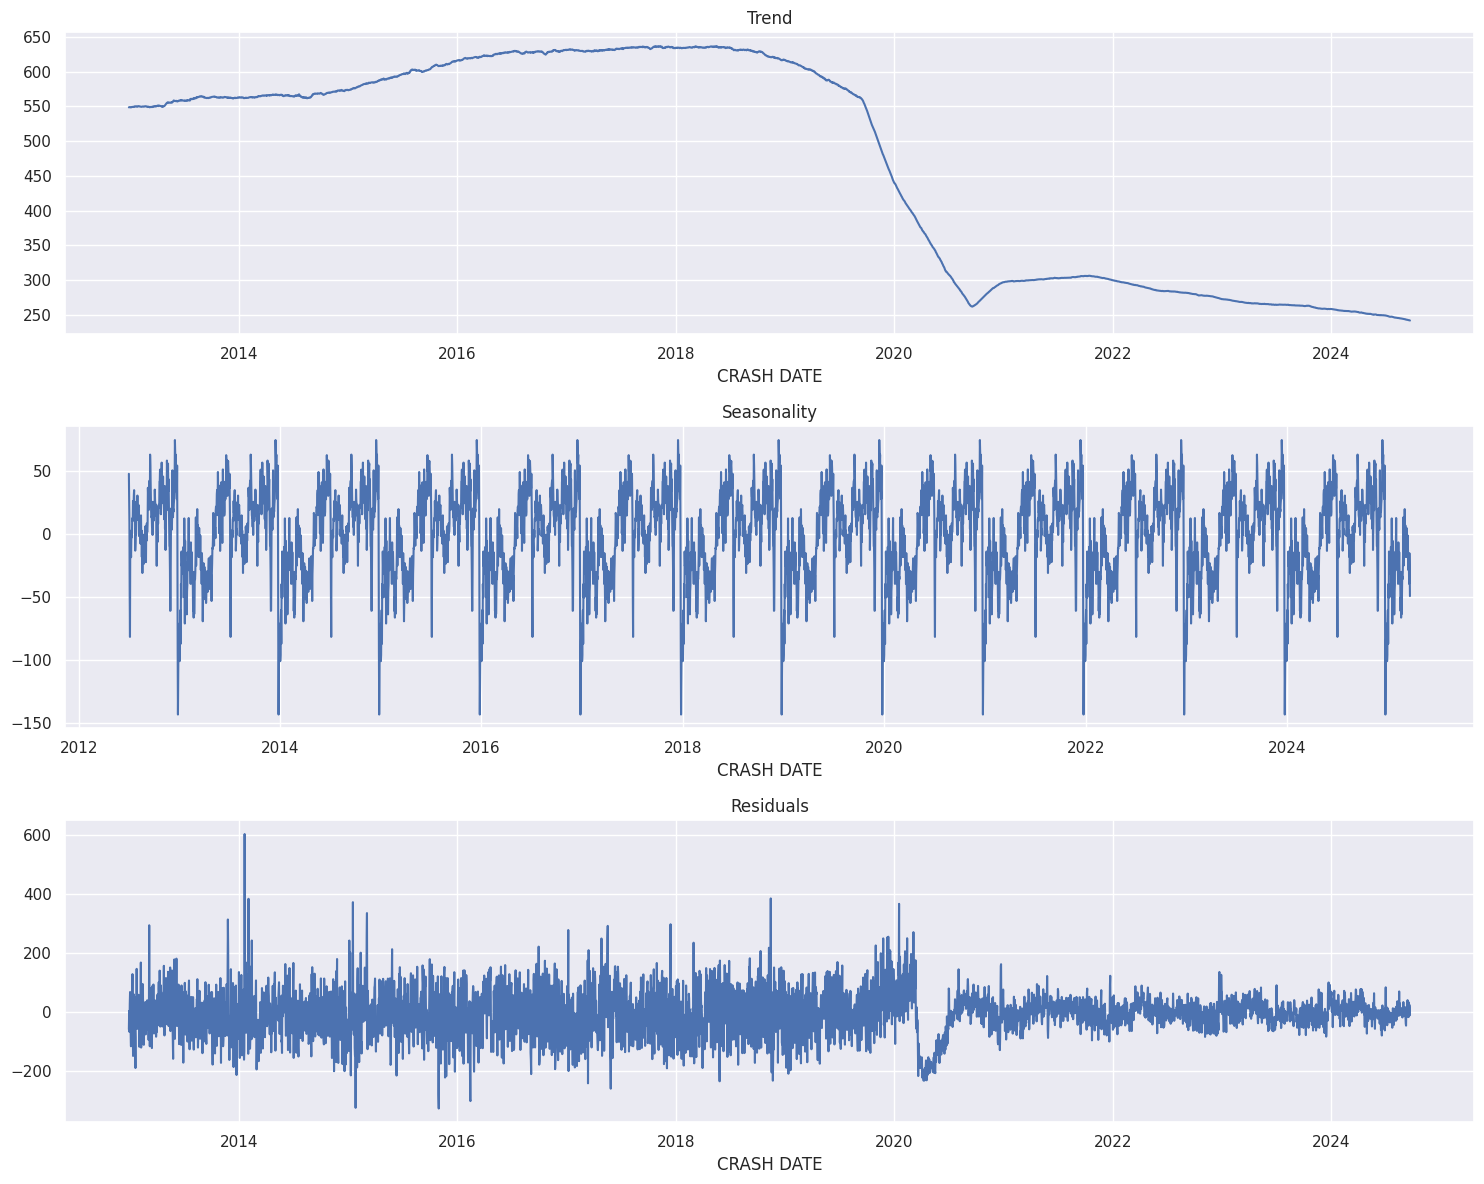

In [ ]:
# Plot the decomposed components
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 12))
decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend')
decomposition.seasonal.plot(ax=ax2)
ax2.set_title('Seasonality')
decomposition.resid.plot(ax=ax3)
ax3.set_title('Residuals')
plt.tight_layout()
plt.show()

The visualizations above provide valuable insights into the time series of daily motor vehicle collisions in New York City.

**Time Series Plot:** This shows the number of daily crashes over time. You might observe long-term trends, seasonal patterns, or significant outliers.

**Decomposed Components:**

**2.1 Trend**: This graph shows the long-term trend in the data, which can indicate whether crashes are increasing, decreasing, or stable over time.

**2.2 Seasonality:** This reveals any regular patterns that repeat over a specific period, such as yearly. It helps identify times of the year with higher or lower crash frequencies.

**2.3 Residuals:** These are the irregular components that cannot be attributed to the trend or seasonality. They might include random or unpredictable fluctuations.

Based on our trend graph,we see an increase in crash at first until 2018 and then we see massive decrease after 2022.

From our residual graph we can see that there was a significant fluctuation during the year 2020 and 2021.

This is because of the lockdown during covid where there were very less vehicles on the road, which resulted in decrease vehicle crashes.



**4. Geo Spatial Analysis**


<ipython-input-15-c4fcfc2f4932>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")


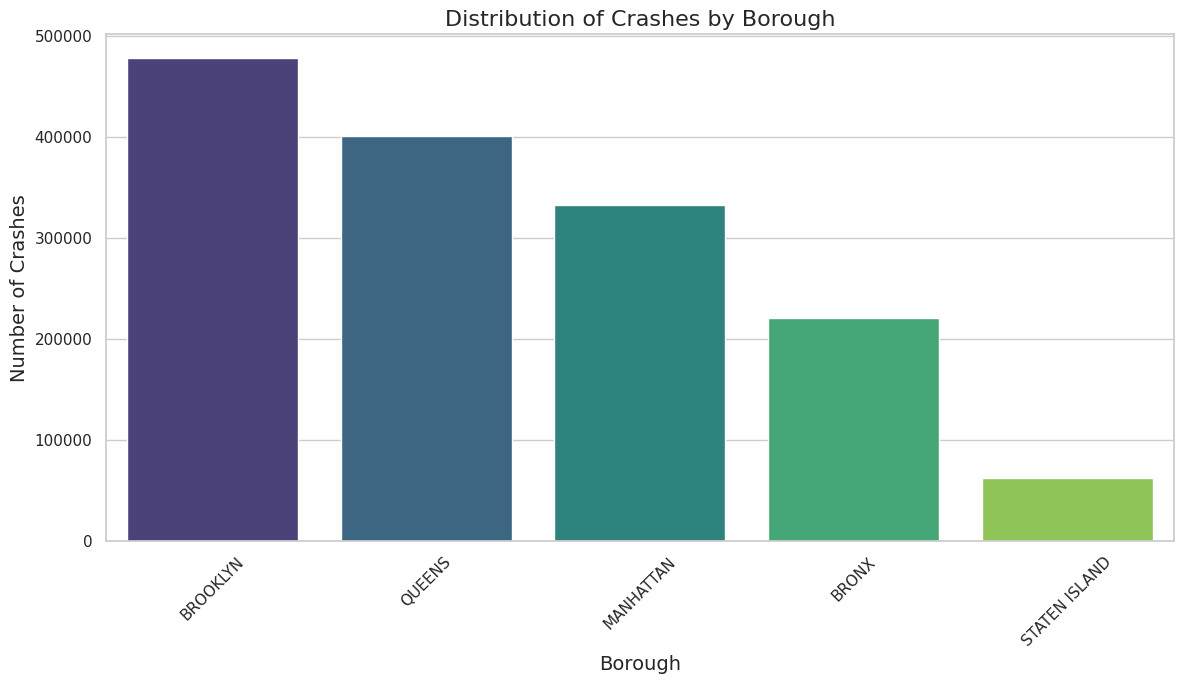

In [ ]:
sns.set_style("whitegrid")

# Plotting the distribution of crashes by borough
plt.figure(figsize=(12, 7))
# Find the count of unique values of BOROUGHS. Hint: Use value_count function.
borough_count = data['BOROUGH'].value_counts()
sns.barplot(x=borough_count.index, y=borough_count.values, palette="viridis")
plt.title('Distribution of Crashes by Borough', fontsize=16)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Brooklyn has the highest number of crashes and staten island has the lowest number of crashes.


Heatmaps/graphical representations that use color coding to represent different values and variables.

In [ ]:
from folium.plugins import HeatMap

data_geo = data.dropna(subset=['LATITUDE', 'LONGITUDE'])
# Create a base map
m = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

heat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in data_geo.iterrows()]
HeatMap(heat_data, radius=8, max_zoom=13).add_to(m)
# Display the map
m.save("Heatmap.html")

When looking at the heatmap we can see that majority of the crashes is happening in the midtown area in NYC.

Though Brooklyn has the highest number of crashes in the borough the concentration of crashes in midtown is more as per the heat map.

In [ ]:
sample_data_severity = data_geo.sample(n=1000, random_state=42)

# Create a base map
m_severity = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

for index, row in sample_data_severity.iterrows():
    if row['NUMBER OF PERSONS KILLED'] > 0:
        color = 'red'

        folium.features.RegularPolygonMarker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            number_of_sides=3,
            radius=6,
            gradient = False,
            color = color,
            fill = True,
            fill_color=color,
            fill_opacity=0.7
        ).add_to(m_severity)


    elif row['NUMBER OF PERSONS INJURED'] > 0:
        color = 'yellow'
        folium.CircleMarker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            radius=5,
            color=color,
            fill=True,
            fill_color=color
        ).add_to(m_severity)
    else:
        color ="blue"
        folium.features.RegularPolygonMarker(
            location=[row['LATITUDE'], row['LONGITUDE']],
            number_of_sides=4,
            radius=5,
            gradient = False,
            color = color,
            fill = True,
            fill_color=color
          ).add_to(m_severity)

# Display the map
m_severity.save("Severity_map.html")

Henry hudson parkway highway seems to be the most dangerous intersection.

How many crashes, injuries, and/or fatalies occurred in a zip code of interest?

In [ ]:
# Create a base map
m = folium.Map(location=[40.7518, 73.8845], zoom_start=10)  # Centered around NYC

# Create a heatmap
JHheat_data = [[row['LATITUDE'], row['LONGITUDE']] for index, row in data_geo.iterrows()]
HeatMap(JHheat_data, radius=8, max_zoom=13).add_to(m)

m.save("JHHeatmap.html")


In [ ]:
data_geo.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Hour of Day
2,2023-11-01,1900-01-01 01:29:00,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN,1
9,2021-09-11,1900-01-01 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN,9
10,2021-12-14,1900-01-01 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN,8
12,2021-12-14,1900-01-01 17:05:00,NaN,NaN,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,...,NaN,NaN,NaN,4486555,Sedan,Tractor Truck Diesel,NaN,NaN,NaN,17
13,2021-12-14,1900-01-01 08:17:00,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,NaN,NaN,NaN,4486660,Sedan,Sedan,NaN,NaN,NaN,8


In [ ]:
data_zip = data.dropna(subset=['ZIP CODE'])

In [ ]:
data_zip.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Hour of Day
2,2023-11-01,1900-01-01 01:29:00,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN,1
9,2021-09-11,1900-01-01 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN,9
10,2021-12-14,1900-01-01 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN,8
13,2021-12-14,1900-01-01 08:17:00,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,NaN,NaN,NaN,4486660,Sedan,Sedan,NaN,NaN,NaN,8
14,2021-12-14,1900-01-01 21:10:00,BROOKLYN,11207.0,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,...,NaN,NaN,NaN,4487074,Sedan,NaN,NaN,NaN,NaN,21


In [ ]:
zipcode_of_JacksonHeights = 11372
filtered_JH_data = data_zip[data_zip['ZIP CODE'] == zipcode_of_JacksonHeights]

In [ ]:
#Finding total crashes, injuries and fatalities from JH area
total_crashes = len(filtered_JH_data)
total_injuries = filtered_JH_data['NUMBER OF PERSONS INJURED'].sum()
total_fatalities = filtered_JH_data['NUMBER OF PERSONS KILLED'].sum()

print(f"Total Crashes in Jackson Heights: {total_crashes}")
print(f"Total Injuries in Jackson Heights: {total_injuries}")
print(f"Total Fatalities in Jackson Heights: {total_fatalities}")

Total Crashes in Jackson Heights: 8817
Total Injuries in Jackson Heights: 2858.0
Total Fatalities in Jackson Heights: 19.0


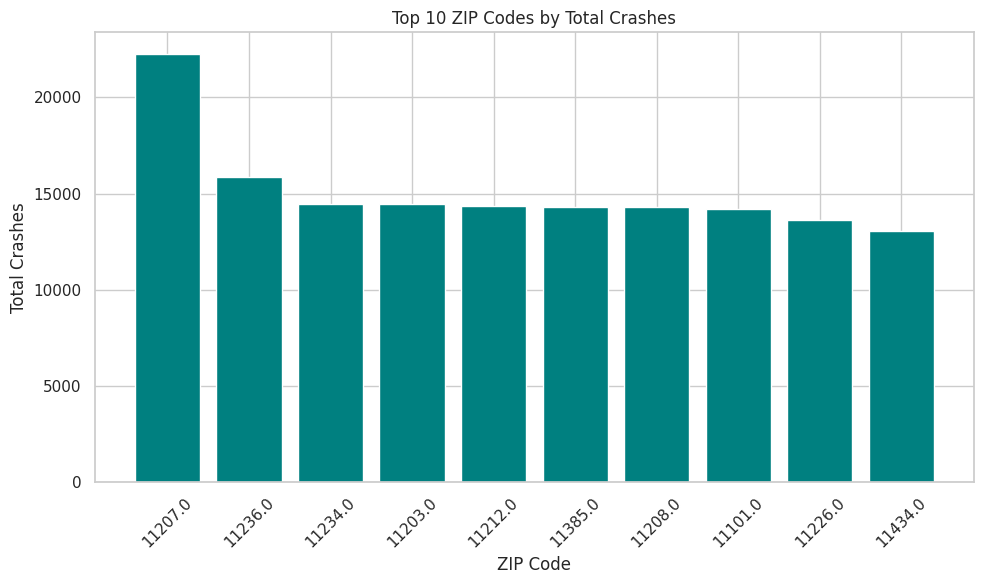

In [ ]:
#Which zip code sees the highest amount of crashes and what recommendations can you
#offer to help that community? Is it an underserved community?
TOTAL_CRASHES_BY_ZIP = data_zip.groupby('ZIP CODE').size().reset_index(name='TOTAL_CRASHES')
top_10_zip_codes = TOTAL_CRASHES_BY_ZIP.nlargest(10, 'TOTAL_CRASHES')

plt.figure(figsize=(10, 6))
plt.bar(top_10_zip_codes['ZIP CODE'].astype(str), top_10_zip_codes['TOTAL_CRASHES'], color='teal')

# Add labels and title
plt.title('Top 10 ZIP Codes by Total Crashes')
plt.xlabel('ZIP Code')
plt.ylabel('Total Crashes')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
data_zip.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Hour of Day
2,2023-11-01,1900-01-01 01:29:00,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN,1
9,2021-09-11,1900-01-01 09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN,9
10,2021-12-14,1900-01-01 08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN,8
13,2021-12-14,1900-01-01 08:17:00,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,NaN,NaN,NaN,4486660,Sedan,Sedan,NaN,NaN,NaN,8
14,2021-12-14,1900-01-01 21:10:00,BROOKLYN,11207.0,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,...,NaN,NaN,NaN,4487074,Sedan,NaN,NaN,NaN,NaN,21
